# Faults injected into Circuit 

1.  Feedback Shorted 
2.  Capacitor CC Fault (Shorted)
3.  Diode D1/D2 Fault (Shorted)
4.  Ground at n10 
5.  VEE Fault (Ground)
6.  VCC Fault (Ground)
7.  Q8 and Q9 Shorted
8.  Q6 Shorted
9.  RE Changing (Much lesser than before) 
10. Transistor Ageing
11. Connection near n20 destroyed
12. Ground at n13

# Necessary Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns; 
sns.set()

# Loading Data From Text Files into a Numpy Array

In [2]:
fault_num = 12
node_num = 17
sampling_num = 20000

In [3]:
normal_data = np.zeros((sampling_num,2*node_num))
normal_data_raw = np.zeros((sampling_num,node_num))

path_normal_data = 'advanced/output_adv.txt'
normal_data_init = np.loadtxt(path_normal_data)
normal_data = normal_data_init[0:sampling_num,:]

for column in range(node_num):
    normal_data_raw[:,column] = normal_data[:,2*column+1]

In [4]:
fault_data = np.zeros((fault_num,sampling_num,2*node_num))

for fault in range(fault_num):
    path_data = 'adv_faults/fault_'+str(fault+1)+'.txt'
    data_init = np.loadtxt(path_data)
    fault_data[fault,:,:] = data_init[0:sampling_num,:]

In [5]:
# Seperating redundant Sampling Points and Data
fault_data_raw = np.zeros((fault_num,sampling_num,node_num))

for column in range(node_num):
    fault_data_raw[:,:,column] = fault_data[:,:,2*column+1]
    
fault_scale = fault_data[0,:,0]

In [188]:
np.shape(fault_scale)
#print(fault_scale)

line_16 = np.ones((sampling_num,)) *16
line_minus_16 = np.ones((sampling_num,)) *(-16)

# Creating Node wise Histograms of Voltage (All Faults Clubbed together)

In [7]:
# Reshaping by stacking all the fault matrices vertically
all_data = fault_data_raw.reshape(sampling_num*fault_num,node_num)

print(np.shape(fault_data_raw))
print(np.shape(all_data))

(12, 20000, 17)
(240000, 17)


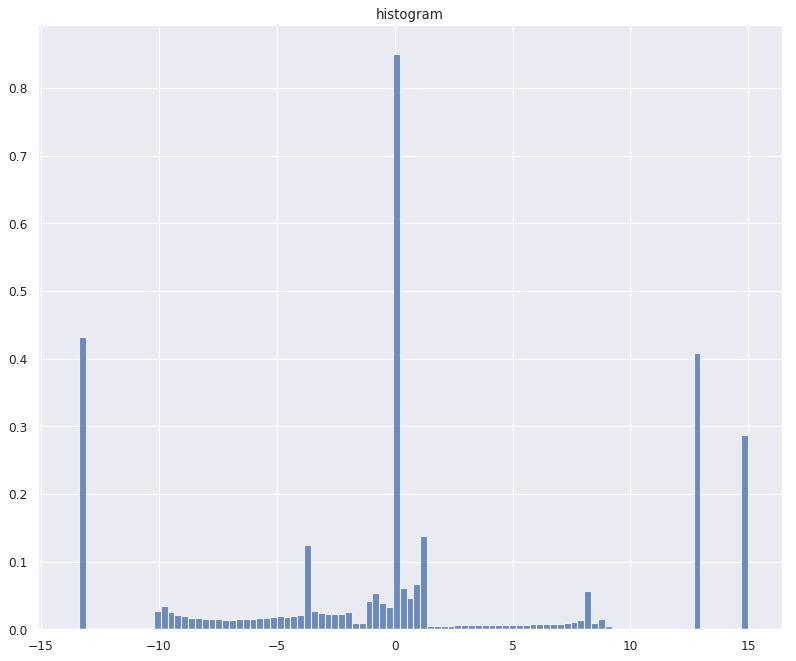

In [8]:
# Choose the Node to plot histogram of that node
node_hist = 16

max_nodes = all_data.max(axis = 0)
min_nodes = all_data.min(axis = 0)

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
bins_hist = np.linspace(min_nodes[node_hist],max_nodes[node_hist],100)
plt.hist(all_data[:,node_hist],bins_hist,density=True, alpha=0.8) 
plt.title("histogram") 
plt.show()


# Plotting Voltage of all nodes for Circuit without fault

(20000, 17)


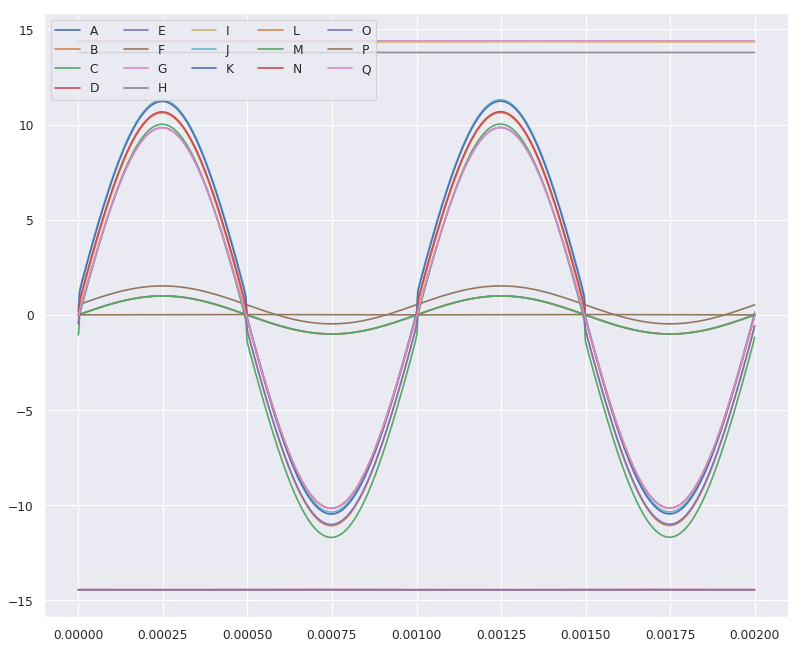

In [9]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fault_scale,normal_data_raw)
plt.legend('ABCDEFGHIJKLMNOPQ', ncol=5, loc='upper left');
print(np.shape(normal_data_raw))
# Here legends A-P represent node_1 to node_16 respectively and Q represents node_20 

# Plotting Voltage of all nodes for Individual Faults

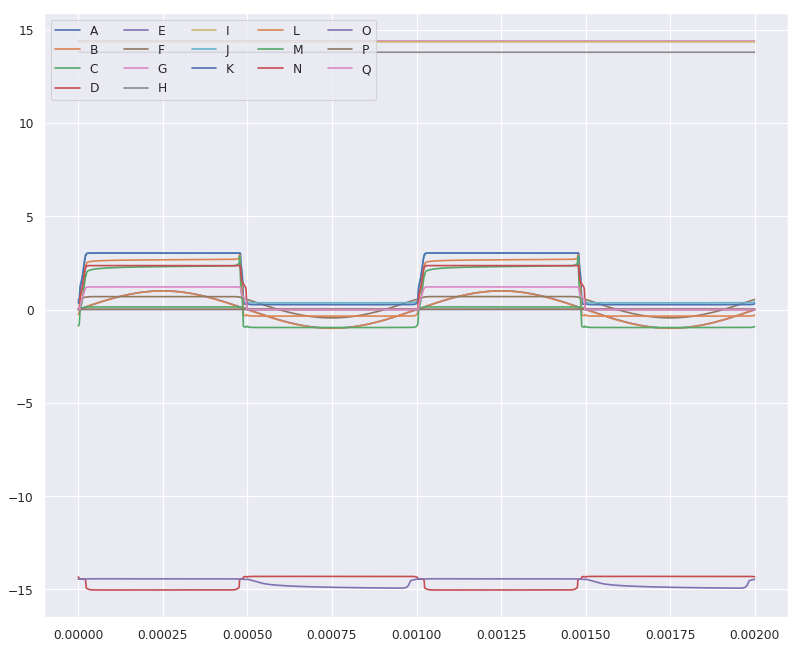

In [10]:
# Choose the fault number to plot node voltages of that fault
fault_plot = 11

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fault_scale,fault_data_raw[fault_plot,:,:])
plt.legend('ABCDEFGHIJKLMNOPQ', ncol=5, loc='upper left')
# Here legends A-P represent node_1 to node_16 respectively and Q represents node_20 

# Comparing Node Voltages (Without Fault Vs. Individual Faults)

In [241]:
# Select the Node to be compared and the faulty circuit with which original circuit will be compared 
# Faults Range from 0-11
# Nodes Range from 2-16
# Example - (8,0)

node_num = 8
fault_num = 0

14.340347569364999
14.339443818329999


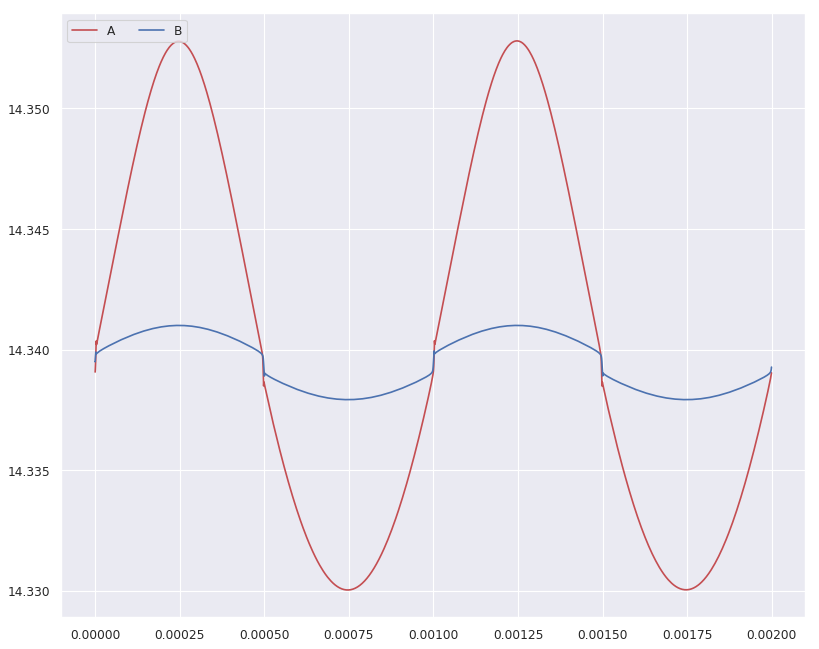

In [243]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(fault_scale,line_16,'g-')
#plt.plot(fault_scale,line_minus_16,'g-')
plt.plot(fault_scale,normal_data_raw[:,node_num],'r-')
plt.plot(fault_scale,fault_data_raw[fault_num,:,node_num],'b-')
plt.legend('AB', ncol=2, loc='upper left');
print(np.mean(normal_data_raw[:,node_num]))
print(np.mean(fault_data_raw[fault_num,:,node_num]))


# K-means Clustering

In [13]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

#cent_init = initialize_centroids(all_data, 10)
#print(cent_init)

In [14]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [15]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [16]:
for i in range(1000):
    centroids_1k = initialize_centroids(all_data, 10)
    closest_1k = closest_centroid(all_data, centroids_1k)
    centroids_1k = move_centroids(all_data, closest_1k, centroids_1k)

print("1k done ------------------------------------------")    
    
for i in range(10000):
    centroids_10k = initialize_centroids(all_data, 10)
    closest_10k = closest_centroid(all_data, centroids_10k)
    centroids_10k = move_centroids(all_data, closest_10k, centroids_10k)
    if(i%1000 == 0):
        print(i)
    
print("10k done --------------------------------------------")
    
for i in range(20000):
    centroids_20k = initialize_centroids(all_data, 10)
    closest_20k = closest_centroid(all_data, centroids_20k)
    centroids_20k = move_centroids(all_data, closest_20k, centroids_20k)
    if(i%1000 == 0):
        print(i)


In [18]:
np.savetxt("kmeans_data/centroids_20k_1.txt",centroids_20k,delimiter =" ")
np.savetxt("kmeans_data/centroids_10k_1.txt",centroids_10k,delimiter =" ")
np.savetxt("kmeans_data/centroids_1k_1.txt",centroids_1k,delimiter =" ")

In [61]:
centroids_20k_1 = np.loadtxt("kmeans_data/centroids_20k_1.txt")
centroids_10k_1 = np.loadtxt("kmeans_data/centroids_10k_1.txt")
centroids_1k_1 = np.loadtxt("kmeans_data/centroids_1k_1.txt")

centroids_20k_2 = np.loadtxt("kmeans_data/centroids_20k_2.txt")
centroids_10k_2 = np.loadtxt("kmeans_data/centroids_10k_2.txt")
centroids_1k_2 = np.loadtxt("kmeans_data/centroids_1k_2.txt")

In [2]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
